In [17]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from IPython.display import HTML
%load_ext autoreload
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from simulation import *

In [19]:
autoreload(simulation)

In [95]:
class BusMap:
    def __init__(self, controller):
        self.init_probability_distribution()
        self.route_table = {}
        self.controller = controller
        
        
    def init_probability_distribution(self):
        
        self._max_choices = 24
        self._avg_travel_time = 5
        
        # initialization of the m_support matrix, TODO replace with exact implementation
        S = len(controller.bus_stop_names)
        T = self._max_choices
        P = np.zeros((T+1, S, S))
        B = 1000

        for s in range(S):    
            distro = np.zeros(S)
            distro[s] = B
            P[0, :, s] = distro

            for t in range(T):
                aux_distro = np.zeros(S)
                for s_prime in range(S):
                    for b in range(int(distro[s_prime])):
                        dest = np.random.choice(controller.connections[s_prime])
                        aux_distro[dest] += 1
                distro = aux_distro
                P[t+1, :, s] = distro
        self._m_support = P / B 
        
    def compute_probability_distribution(self, bus_id):
        timestamp, bus_stop = self.route_table[bus_id]
        delta_t = controller.ticks - timestamp 
        
        if delta_t < 0:
            delta_t = 0
            
        choices = int(delta_t / self._avg_travel_time )
        
        if choices > self._max_choices:
            choices = self._max_choices
            
        return self._m_support[choices, :, bus_stop.stop_id]
    
    def compute_entropy(self, bus_id):
        prob = self.compute_probability_distribution(bus_id)
        prob = np.array(prob)
        
        sum = 0
        
        for p in prob:
            if p > 0:
                sum += p*np.log(p)
                
        return -sum

In [96]:
controller = Controller(TestBus, debug=True)
bus_map = BusMap(controller)

In [97]:
bus_map.route_table[24]=(3,controller.bus_stops[2])
bus_map.route_table[23]=(23,controller.bus_stops[1])

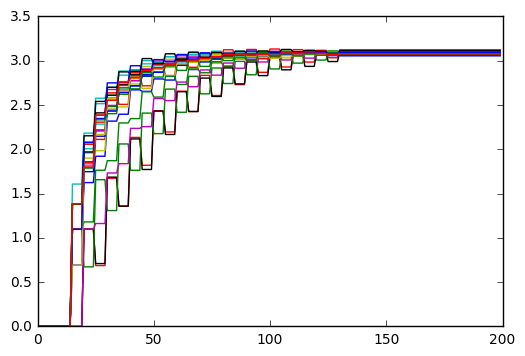

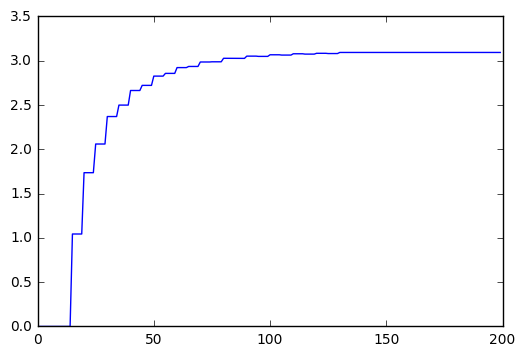

In [107]:
avg_entropy = np.array([])
for j in range(24):
    y = []
    bus_map.route_table[j]=(10,controller.bus_stops[j])
    for i in range(200):
        controller.ticks = i
        y.append(bus_map.compute_entropy(j))
    plt.plot(y)
    if avg_entropy.any():
        avg_entropy+=np.array(y)
    else:
        avg_entropy=np.array(y)

plt.show()
plt.plot(avg_entropy/24)
plt.show()